In [30]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

if not 'BASE_DIR' in locals():
    BASE_DIR = os.path.abspath(os.curdir)

In [31]:
if os.path.abspath(os.curdir) == BASE_DIR:
    os.chdir('../')

dirname = os.path.abspath(os.curdir) + r'\data'
df = pd.read_csv(path.join(os.sep, dirname, 'Annual snowfall in Chicago 1939 to 1978.csv'))
df.head()

,Unnamed: 0,x
0,1,33.9
1,2,31.0
2,3,52.5
3,4,29.8
4,5,45.2


In [32]:
df.describe()

,Unnamed: 0,x
count,40.000000,40.000000
mean,20.500000,41.442500
std,11.690452,15.714584
min,1.000000,14.300000
25%,10.750000,30.700000
50%,20.500000,38.000000
75%,30.250000,52.275000
max,40.000000,82.300000


<Figure size 1200x700 with 0 Axes>

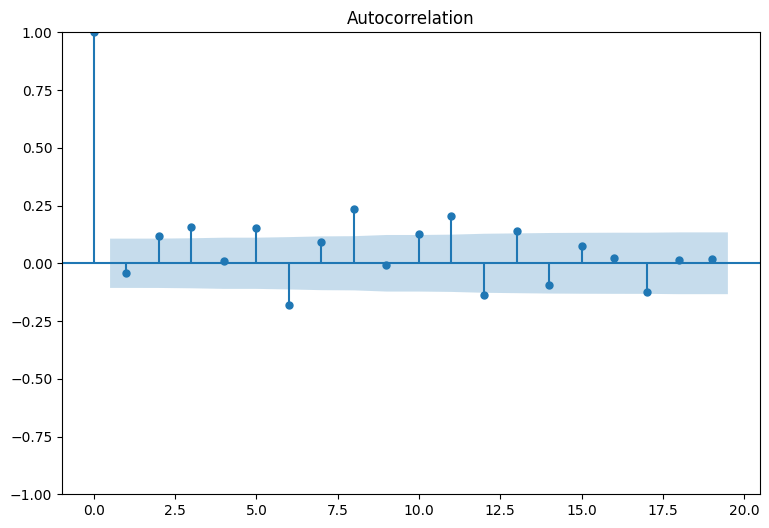

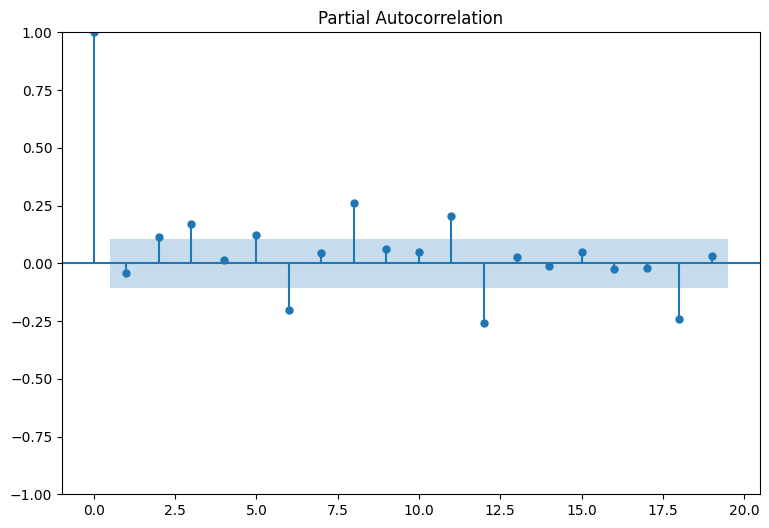

In [33]:
import statsmodels.tsa.api as smt
ts = df['x']
fig = plt.figure(figsize=(12, 7))
ac_plot = smt.graphics.plot_acf(ts, lags=19, alpha=0.5)
pac_plot = smt.graphics.plot_pacf(ts, lags=19, alpha=0.5)

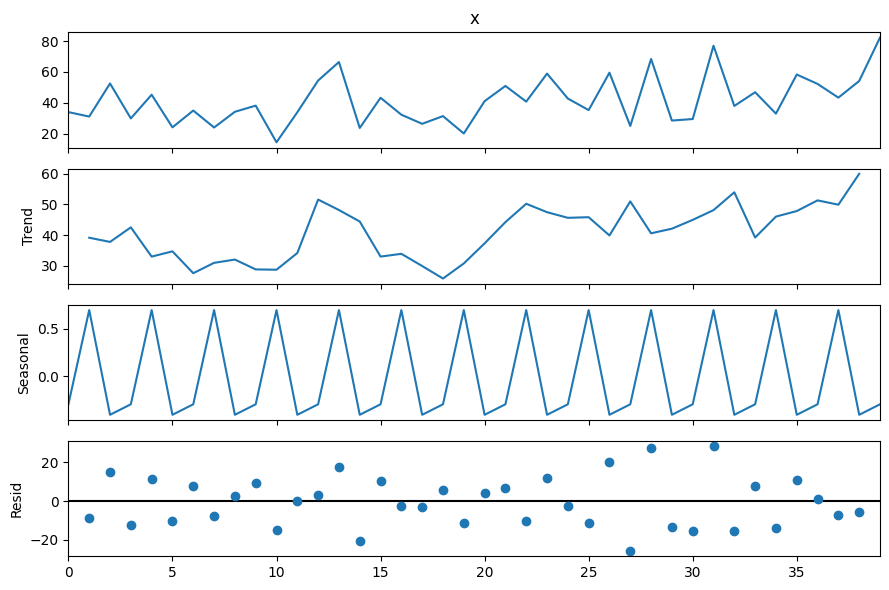

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']= 9, 6
decompose = seasonal_decompose(df['x'], period=3)
decompose.plot()
plt.show()

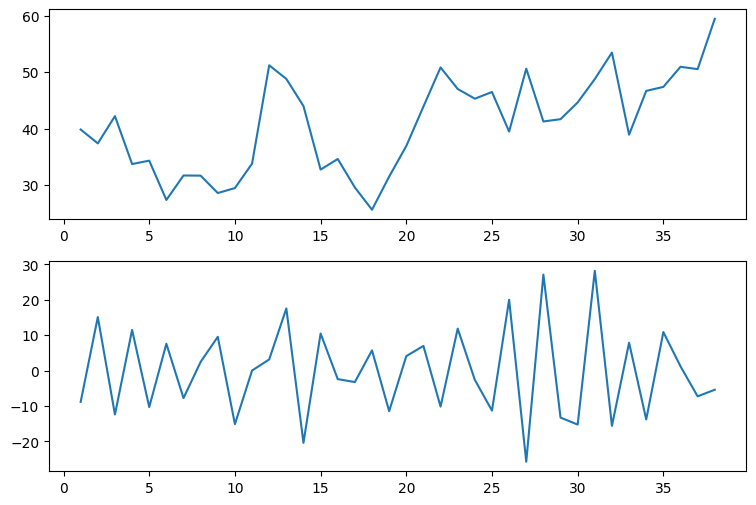

In [35]:
fg, axs = plt.subplots(nrows=2)
axs[0].plot(decompose.seasonal+decompose.trend)
axs[1].plot(decompose.resid)

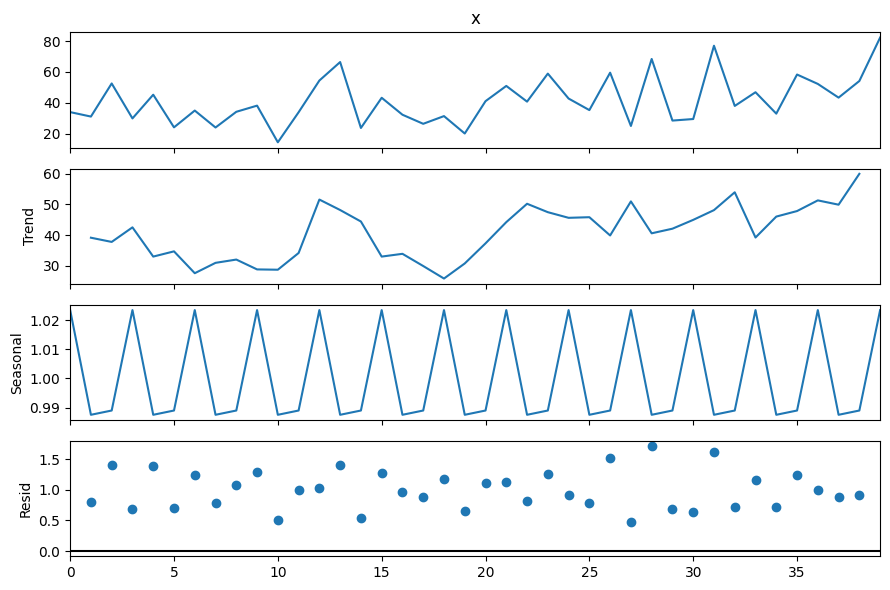

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']= 9, 6
decompose = seasonal_decompose(df['x'], period=3, model='multiplicative')
decompose.plot()
plt.show()

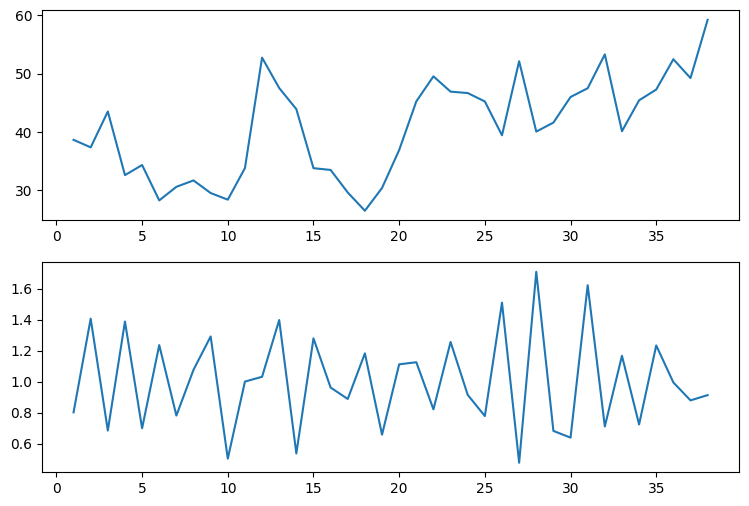

In [37]:
fg, axs = plt.subplots(nrows=2)
axs[0].plot(decompose.seasonal*decompose.trend)
axs[1].plot(decompose.resid)

<Axes: >

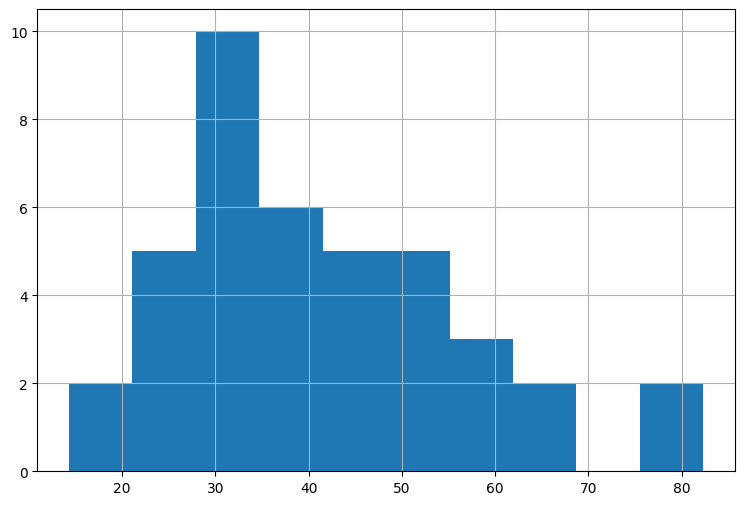

In [38]:
df['x'].hist()

<Axes: >

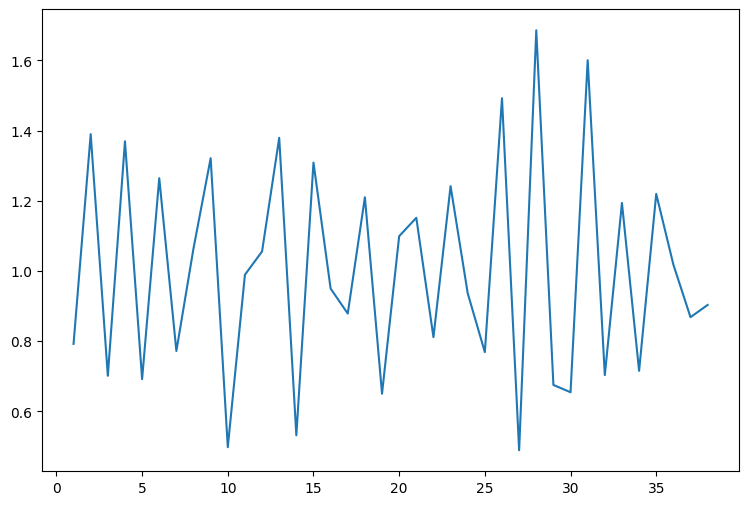

In [39]:
(decompose.seasonal * decompose.resid).plot()

In [40]:
from statsmodels.tsa.stattools import adfuller

# Выполняем тест Дики-Фуллера на стационарность
result = adfuller(df['x'])
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:')
for key, value in result[4].items():
    print('\t', key, ':', value)

# Проверяем стационарность временного ряда
if result[1] < 0.05:
    print('Временной ряд является стационарным')
else:
    print('Временной ряд не является стационарным')

ADF статистика: -5.830728243371507
p-value: 3.980943384387428e-07
Критические значения:
	 1% : -3.610399601308181
	 5% : -2.939108945868946
	 10% : -2.6080629651545038
Временной ряд является стационарным
